In [2]:
#importing python library

#libraries for data manipulating
import pandas as pd
import numpy as np

#libraries for visualising the data
import matplotlib.pyplot as plt
import seaborn as sns

#module for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#importing statsmodel library for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose # it splits a time series into three components: trend, seasonality, and the residuals
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf #A convenience interface for specifying models using formula strings and DataFrames.
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error


#module for iteration
import itertools

C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 1.1 Read the data as an appropriate Time Series data and plot the data.

In [3]:
df=pd.read_csv('Shoe-Sales (1).csv')

In [4]:
#printing first 5 data of the dataset
df.head()

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


In [5]:
#printing last 5 data of the dataset
df.tail()

,YearMonth,Shoe_Sales
182,1995-03,188
183,1995-04,195
184,1995-05,189
185,1995-06,220
186,1995-07,274


In [6]:
#getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   187 non-null    object
 1   Shoe_Sales  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


Observations:-Year Month is an object datatype.It needed to be changed to datetime 

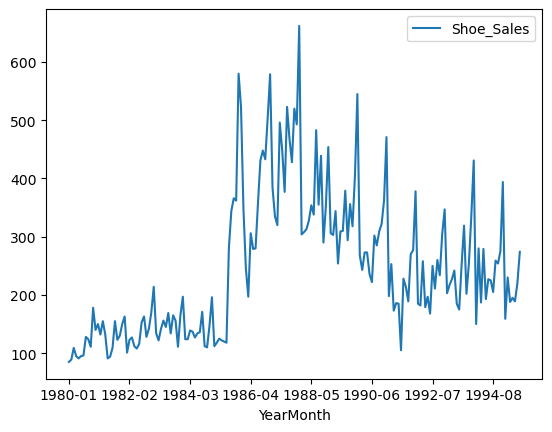

In [7]:
#Plot the time series
df.plot(x='YearMonth',y='Shoe_Sales');

As we can observe from the graph that there are no missing values or null values .Still We need to check more.

# 1.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [8]:
df.shape

(187, 2)

There are 187 column and 2 rows

In [9]:
# Changing Datatype of Year Month 
df=pd.read_csv('Shoe-Sales (1).csv',parse_dates = ['YearMonth'])

In [10]:
df.dtypes

YearMonth     datetime64[ns]
Shoe_Sales             int64
dtype: object

In [11]:
#Extracting year from YearMonth
df['Year'] = pd.DatetimeIndex(df['YearMonth']).year

In [12]:
#Extracting Month from YearMonth 
df['Month'] = pd.DatetimeIndex(df['YearMonth']).month

In [13]:
#checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    datetime64[ns]
 1   Shoe_Sales  187 non-null    int64         
 2   Year        187 non-null    int32         
 3   Month       187 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 4.5 KB


In [14]:
#printing first few rows from the datasets
df.head(10)

,YearMonth,Shoe_Sales,Year,Month
0,1980-01-01,85,1980,1
1,1980-02-01,89,1980,2
2,1980-03-01,109,1980,3
3,1980-04-01,95,1980,4
4,1980-05-01,91,1980,5
5,1980-06-01,95,1980,6
6,1980-07-01,96,1980,7
7,1980-08-01,128,1980,8
8,1980-09-01,124,1980,9
9,1980-10-01,111,1980,10


In [15]:
#printing last few rows from the datasets
df.tail(10)

,YearMonth,Shoe_Sales,Year,Month
177,1994-10-01,254,1994,10
178,1994-11-01,275,1994,11
179,1994-12-01,394,1994,12
180,1995-01-01,159,1995,1
181,1995-02-01,230,1995,2
182,1995-03-01,188,1995,3
183,1995-04-01,195,1995,4
184,1995-05-01,189,1995,5
185,1995-06-01,220,1995,6
186,1995-07-01,274,1995,7


In [16]:
# number of rows and columns
df.shape

(187, 4)

Now there are 187 rows and 4 columns

In [17]:
round(df.describe())

,YearMonth,Shoe_Sales,Year,Month
count,187,187.0,187.0,187.0
mean,1987-10-01 08:51:20.213903744,246.0,1987.0,6.0
min,1980-01-01 00:00:00,85.0,1980.0,1.0
25%,1983-11-16 00:00:00,144.0,1983.0,3.0
50%,1987-10-01 00:00:00,220.0,1987.0,6.0
75%,1991-08-16 12:00:00,316.0,1991.0,9.0
max,1995-07-01 00:00:00,662.0,1995.0,12.0
std,NaN,121.0,5.0,3.0


Observations:
YearMonth is  from 1st january 1980 to 1st july 1995.  
Highest shoe Sales -662.  
Lower Shoe Sales-85.  
Mean Shoe Sales-245.  

In [18]:
## Checking for null values
df.isnull().sum()

YearMonth     0
Shoe_Sales    0
Year          0
Month         0
dtype: int64

There are no null values or missing values

In [19]:
##checking for duplicacy
df.duplicated().sum()

0

There are no duplicate values

## Univariate Analysis

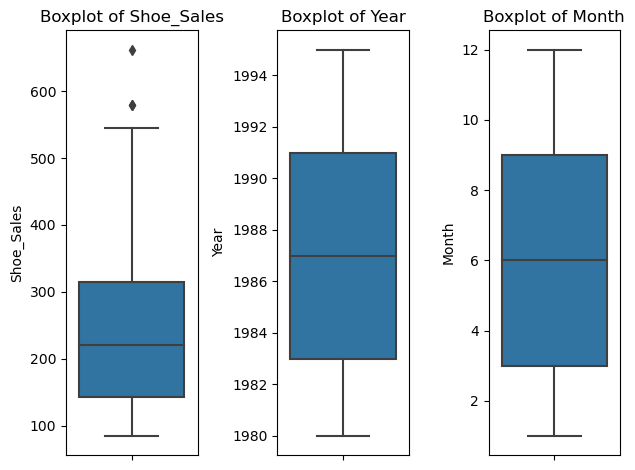

In [20]:
# plotting boxplot for all the columns
feature_list = df.columns[1:4]
for i in range(len(feature_list)):
    plt.subplot(1,3, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

There are outliers in Shoesales

### Year wise plot

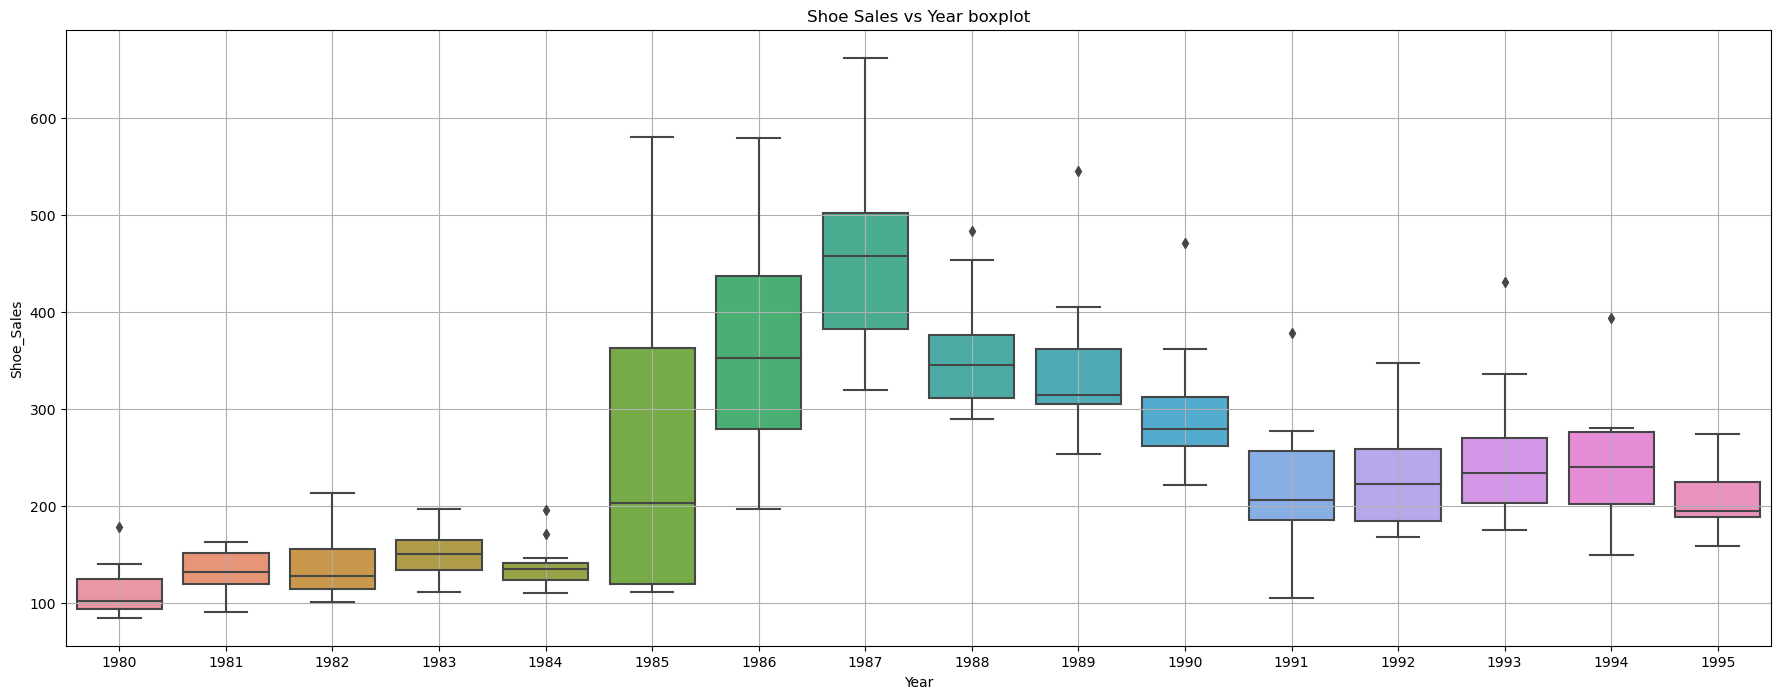

In [21]:
#plotting Boxplot for shoesales vs year
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df['Year'],y=df['Shoe_Sales'],data=df,ax=ax)
plt.title('Shoe Sales vs Year boxplot')
plt.grid();

Sales increased during the year 1987.  
The sales varied during 1985.  
The sales started decreasing again after 1987.

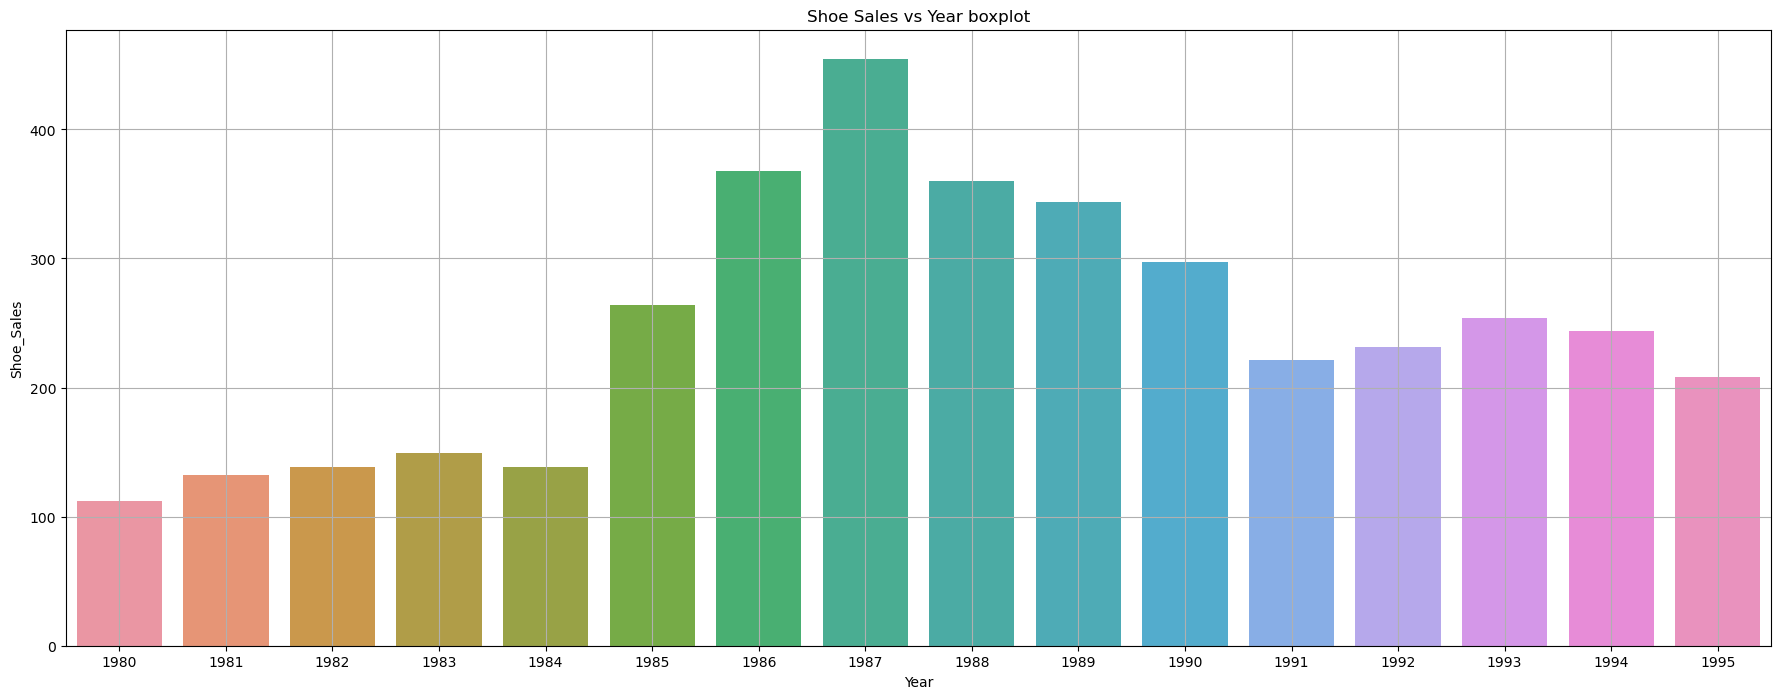

In [22]:
#plotting Barplot for shoesales vs year
_, ax = plt.subplots(figsize=(22,8))
sns.barplot(x=df['Year'],y=df['Shoe_Sales'],data=df,ci=None)
plt.title('Shoe Sales vs Year boxplot')
plt.grid();

Observations are same like boxplot.

### Month wise plot

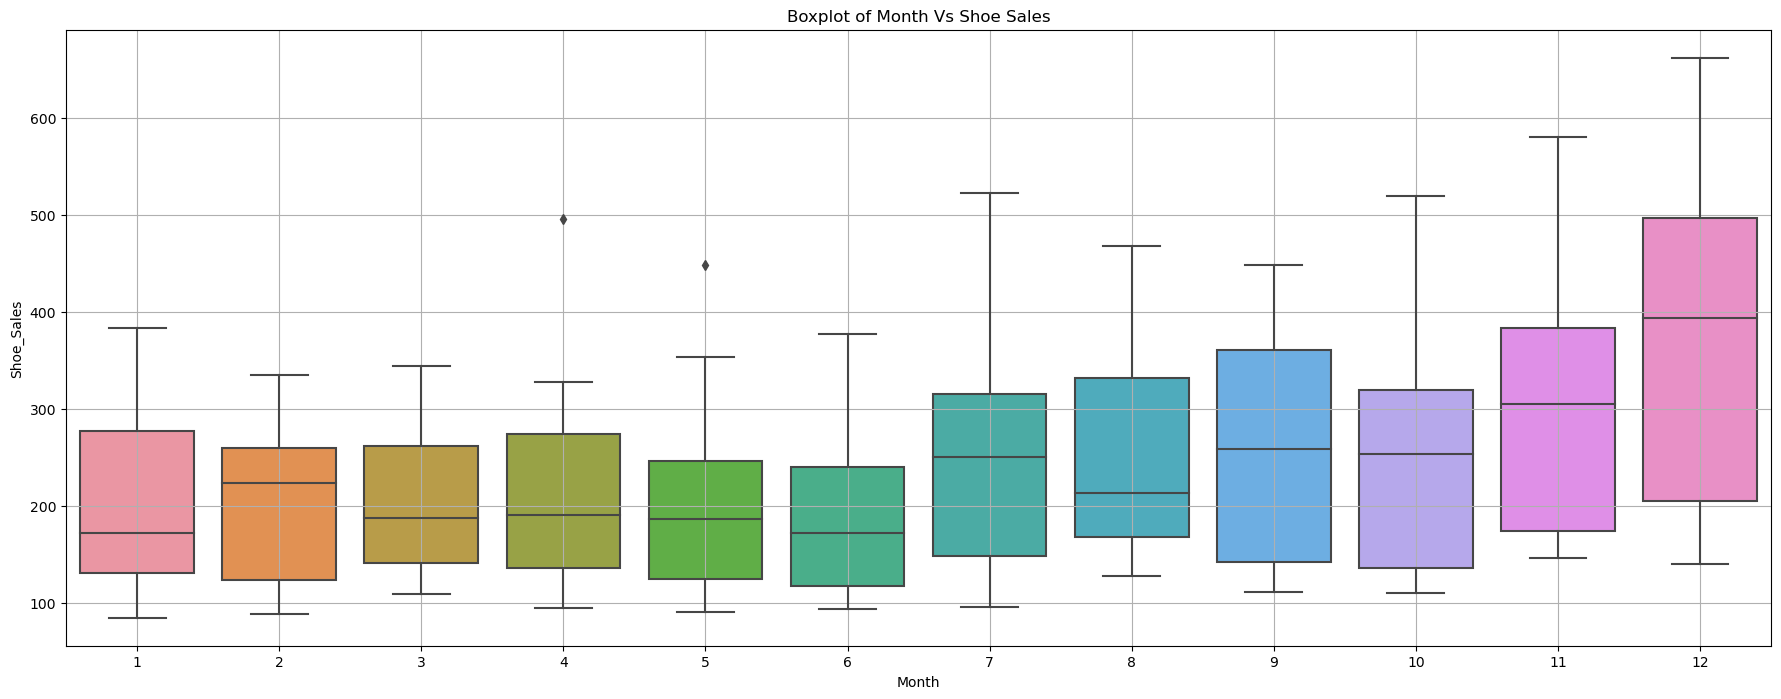

In [23]:
#Plotting Boxplot for Month Vs Shoe Sales
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df['Month'],y=df['Shoe_Sales'],data=df)
plt.title('Boxplot of Month Vs Shoe Sales')
plt.grid();

Sales is more in December month and less during June (mid year).There is a possibility that during festive season sales increases.

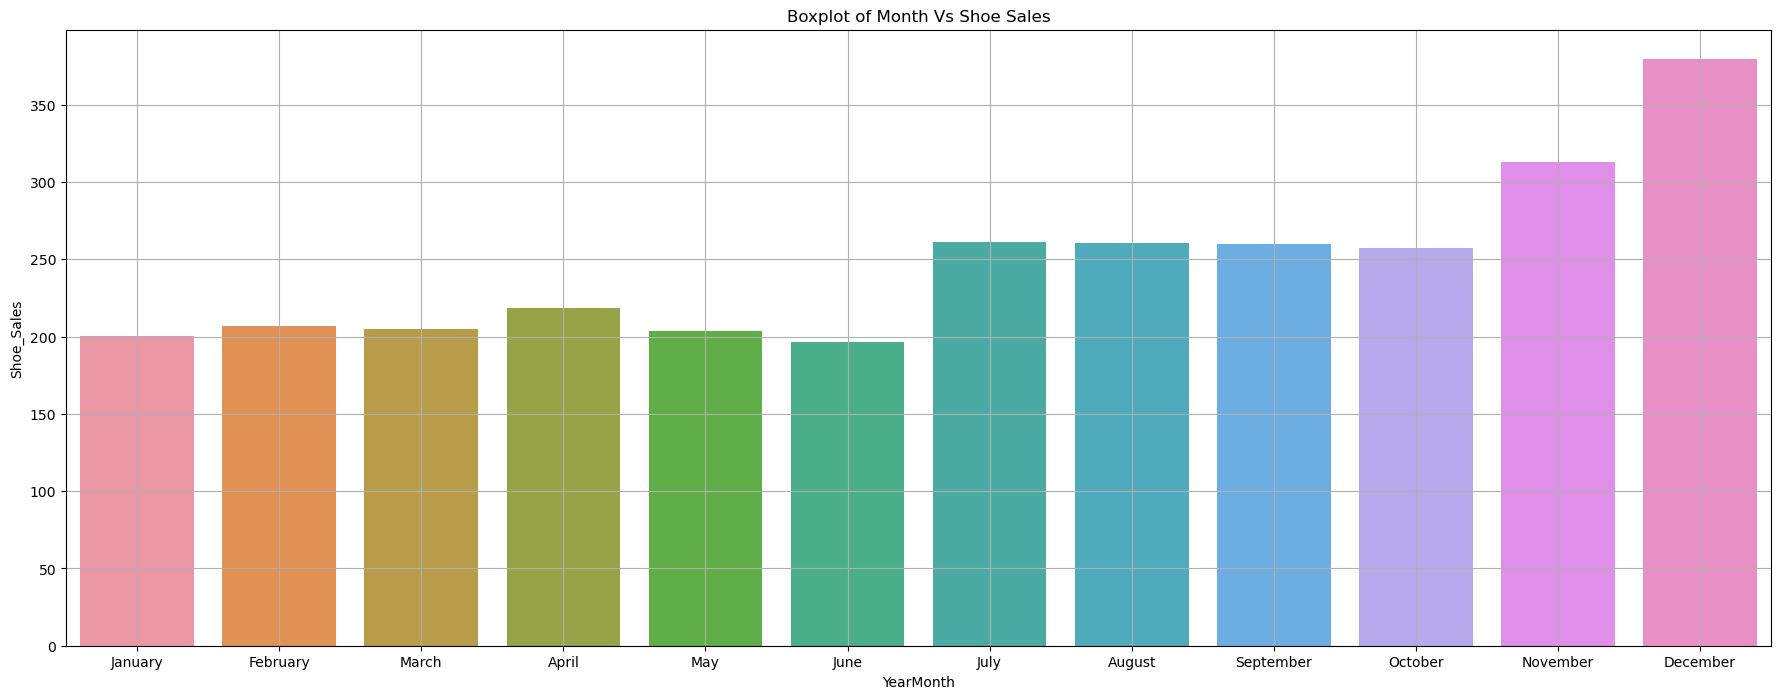

In [24]:
#Plotting Barplot for Month Vs Shoe Sales
_, ax = plt.subplots(figsize=(22,8))
sns.barplot(x=df['YearMonth'].dt.month_name(),y=df['Shoe_Sales'],data=df,ci=None)
plt.title('Boxplot of Month Vs Shoe Sales')
plt.grid();

Same Observations in the barplot also.

### Multivariate Analysis

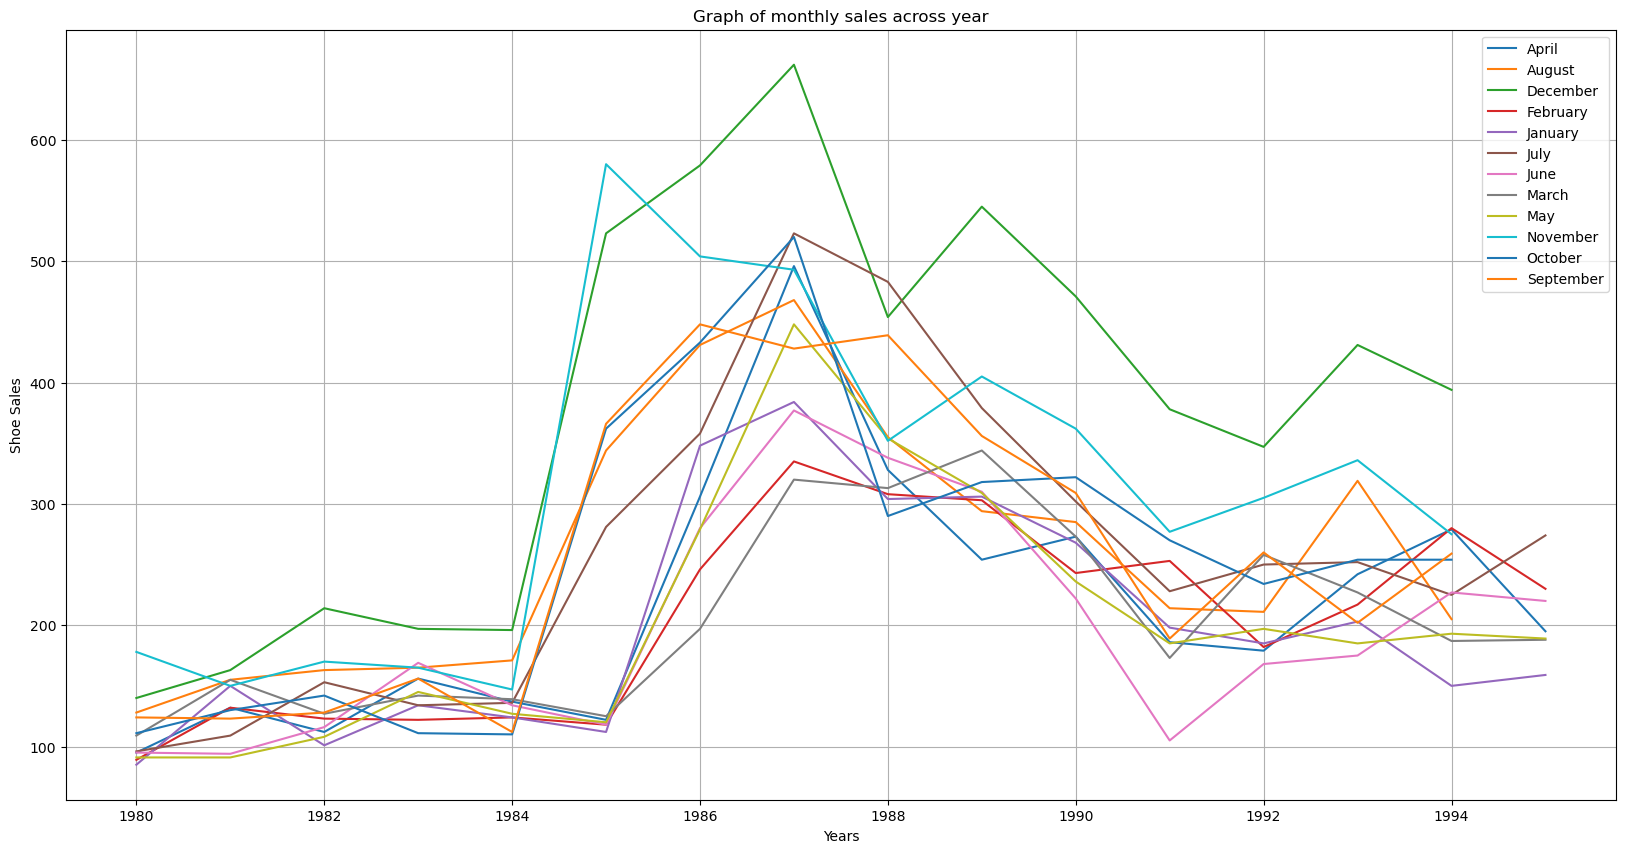

In [25]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Shoe_Sales', columns = df['YearMonth'].dt.month_name(), index = df['YearMonth'].dt.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.title(label='Graph of monthly sales across year')
plt.grid()
plt.legend(loc='best');

December has the highest sale most of the year.

## Decomposition of a Time Series

In [26]:
#Decomposing the time series additively
df_add_decompose=seasonal_decompose(df['Shoe_Sales'],model='additive',period =12)

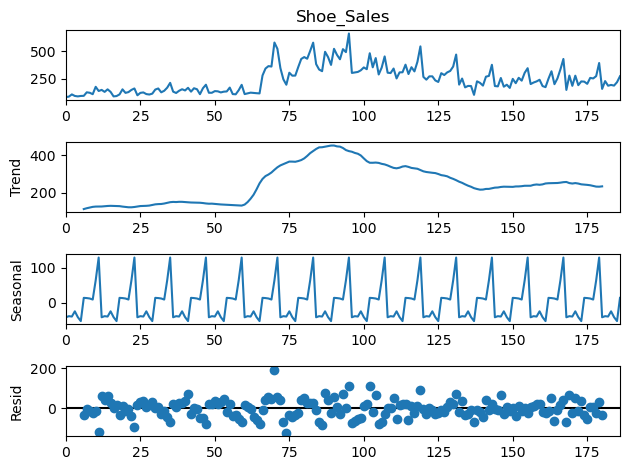

In [27]:
df_add_decompose.plot()
plt.show()

Trend: 12-months MA is not linear which doesnot shows any trend.

Seasonality: seasonality of 12 months is clearly visible.

Irregular Remainder (random): There are no patterns in the residuals in additive model .

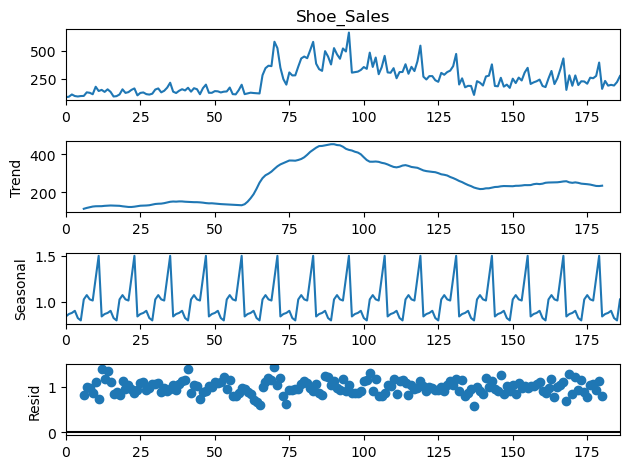

In [28]:
##Decompose the time series multiplicatively
df_mul_decompose = seasonal_decompose(df['Shoe_Sales'], model = 'multiplicative',period=12)
df_mul_decompose.plot()
plt.show()

Trend:12months MA is not showing ny trend.  
Seasonality:Seasonality of 12 months is clearly visible.  
Residual:The Residual is showing some pattern 

## 1.3)Split the data into training and test. The test data should start in 1991.

Split the data into training and test. The data from 1980-1991 should be training data.The data from 1991-1995 is test data

In [29]:
train=df[df.YearMonth<'1991']
test=df[df.YearMonth>'1991']

In [30]:
# Printing the Test Train Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,YearMonth,Shoe_Sales,Year,Month
0,1980-01-01,85,1980,1
1,1980-02-01,89,1980,2
2,1980-03-01,109,1980,3
3,1980-04-01,95,1980,4
4,1980-05-01,91,1980,5
...,...,...,...,...
127,1990-08-01,285,1990,8
128,1990-09-01,309,1990,9
129,1990-10-01,322,1990,10
130,1990-11-01,362,1990,11


Test Data


,YearMonth,Shoe_Sales,Year,Month
133,1991-02-01,253,1991,2
134,1991-03-01,173,1991,3
135,1991-04-01,186,1991,4
136,1991-05-01,185,1991,5
137,1991-06-01,105,1991,6
138,1991-07-01,228,1991,7
139,1991-08-01,214,1991,8
140,1991-09-01,189,1991,9
141,1991-10-01,270,1991,10
142,1991-11-01,277,1991,11


In [31]:
#Shape of Test and  Train Dataset
print('Training Data')
display(train.shape)
print('Test Data')
display(test.shape)

Training Data


(132, 4)

Test Data


(54, 4)

There are 132 training data and 54 test data.There are 4 rows in both the dataset.

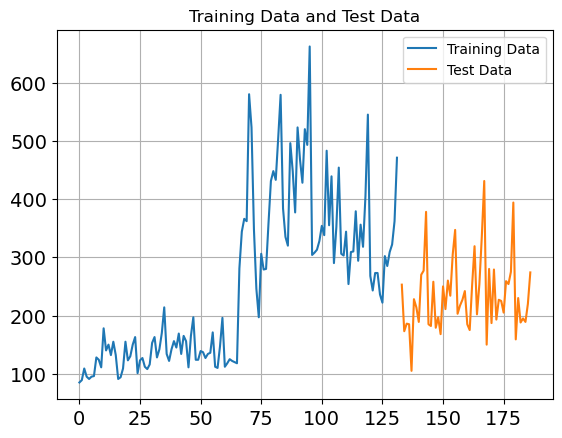

In [32]:
train['Shoe_Sales'].plot(fontsize=14)
test['Shoe_Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Training Data and Test Data")
plt.show()

## 1.4)Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### Exponential Smoothing 
Exponential smoothing is a method for forecasting univariate time series data. It is based on the principle that a prediction is a weighted linear sum of past observations or lags. The Exponential Smoothing time series method works by assigning exponentially decreasing weights for past observations. The technique is so called because the weight assigned to each demand observation exponentially decreases. 

### Simple Exponential Smoothing

Simple or single exponential smoothing
If the data has no trend and no seasonal pattern, then this method of forecasting the time series is essentially used. This method uses weighted moving averages with exponentially decreasing weights.

The single exponential smoothing formula is given by:

st = αxt+(1 – α)st-1 = st-1 + α(xt – st-1)

In [33]:
# create class
model_SES = SimpleExpSmoothing(train['Shoe_Sales'],initialization_method='estimated')

In [34]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [35]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.60504993589639,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.82961878179444,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [36]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

132    420.229967
133    420.229967
134    420.229967
135    420.229967
136    420.229967
137    420.229967
138    420.229967
139    420.229967
140    420.229967
141    420.229967
142    420.229967
143    420.229967
144    420.229967
145    420.229967
146    420.229967
147    420.229967
148    420.229967
149    420.229967
150    420.229967
151    420.229967
152    420.229967
153    420.229967
154    420.229967
155    420.229967
156    420.229967
157    420.229967
158    420.229967
159    420.229967
160    420.229967
161    420.229967
162    420.229967
163    420.229967
164    420.229967
165    420.229967
166    420.229967
167    420.229967
168    420.229967
169    420.229967
170    420.229967
171    420.229967
172    420.229967
173    420.229967
174    420.229967
175    420.229967
176    420.229967
177    420.229967
178    420.229967
179    420.229967
180    420.229967
181    420.229967
182    420.229967
183    420.229967
184    420.229967
185    420.229967
dtype: float64

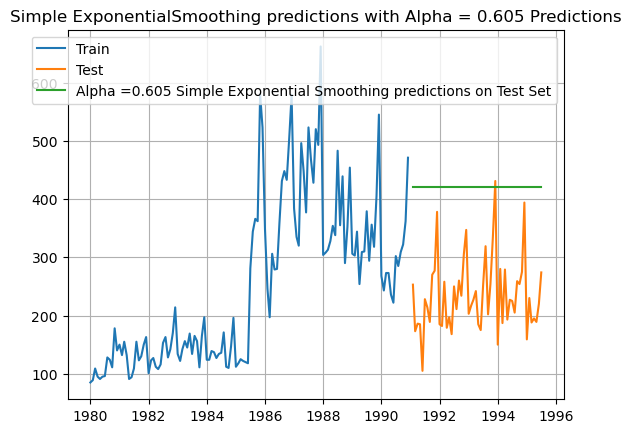

In [50]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['YearMonth'], train['Shoe_Sales'],label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'],label='Test')

plt.plot(test['YearMonth'],SES_predict, label='Alpha =0.605 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple ExponentialSmoothing predictions with Alpha = 0.605 Predictions');

In [52]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [53]:
MAPE_SES=MAPE(test['Shoe_Sales'].values,SES_predict.values)
print('SES MAPE:',MAPE_SES)

SES MAPE: 91.42076016336813


In [54]:
#calculating RMSE
RMSE_SES_sklearn=mean_squared_error(test['Shoe_Sales'].values,SES_predict.values,squared=False)
print('SES RMSE(calculated using sklearn):',RMSE_SES_sklearn)
#different way to calculate RMSE
RMSE_SES_sm=em.rmse(test['Shoe_Sales'].values,SES_predict.values)
print('SES RMSE (calculated using statsmodels):',RMSE_SES_sm)

SES RMSE(calculated using sklearn): 195.89459510493793
SES RMSE (calculated using statsmodels): 195.89459510493793


In [55]:
resultsDf1_SES = pd.DataFrame({'RMSE (sklearn)': [RMSE_SES_sklearn],'RMSE (statsmodel)': [RMSE_SES_sm],'MAPE': [MAPE_SES]},index=['Alpha=0.605,SES'])
resultsDf1_SES

,RMSE (sklearn),RMSE (statsmodel),MAPE
"Alpha=0.605,SES",195.894595,195.894595,91.42076


## Holt - ETS(A, A, N) - Holt's linear method with additive errors
### Double Exponential Smoothing

One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend. This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters. Applicable when data has Trend but no seasonality. Two separate components are considered: Level and Trend. Level is the local mean. One smoothing parameter α corresponds to the level series A second smoothing parameter β corresponds to the trend series.

The double exponential smoothing formula is derived by:

S1 = y1

B1 = y1-y0

For t>1,

st = θyt + (1 – θ)(st-1 + bt-1)

βt = β(st – st-1) + (1 – β)bt-1

Here,

St is smoothed statistic, it is the simple weighted average of present observation yt

st-1 = former smoothed statistic

θ = smoothing factor of data; 0 < θ < 1

t = time period

bt = accurate estimation of trend at time t

β = trend smoothing factor; 0 < β <1

In [56]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train['Shoe_Sales'],initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5949085457600333, 'smoothing_trend': 0.0002777648923329902, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 82.93522505452626, 'initial_trend': 2.5392328089641367, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [57]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

132    422.908695
133    425.448566
134    427.988438
135    430.528309
136    433.068181
137    435.608052
138    438.147924
139    440.687795
140    443.227667
141    445.767538
142    448.307410
143    450.847281
144    453.387153
145    455.927024
146    458.466896
147    461.006767
148    463.546639
149    466.086510
150    468.626382
151    471.166253
152    473.706125
153    476.245996
154    478.785868
155    481.325739
156    483.865611
157    486.405482
158    488.945354
159    491.485225
160    494.025097
161    496.564968
162    499.104840
163    501.644711
164    504.184583
165    506.724454
166    509.264326
167    511.804197
168    514.344069
169    516.883940
170    519.423812
171    521.963683
172    524.503555
173    527.043426
174    529.583298
175    532.123169
176    534.663041
177    537.202912
178    539.742783
179    542.282655
180    544.822526
181    547.362398
182    549.902269
183    552.442141
184    554.982012
185    557.521884
dtype: float64

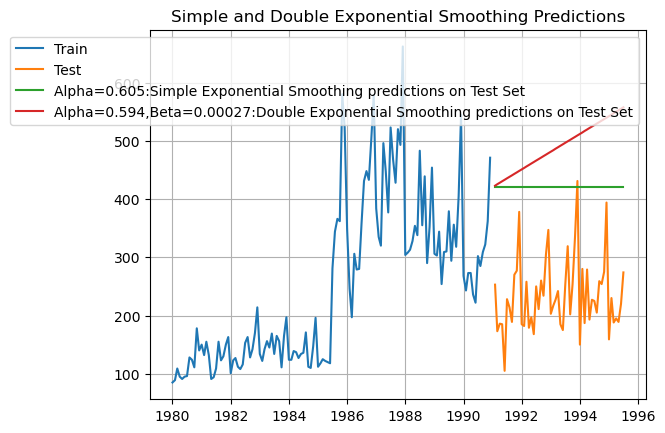

In [58]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['YearMonth'],train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')

plt.plot(test['YearMonth'],SES_predict, label='Alpha=0.605:Simple Exponential Smoothing predictions on Test Set')
plt.plot(test['YearMonth'],DES_predict, label='Alpha=0.594,Beta=0.00027:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [59]:
MAPE_DES=MAPE(test['Shoe_Sales'].values,DES_predict.values)
print('DES MAPE:',MAPE_DES)

DES MAPE: 122.32528367957886


In [60]:
#calculating RMSE
RMSE_DES_sklearn=mean_squared_error(test['Shoe_Sales'].values,DES_predict.values,squared=False)
print('DES RMSE(calculated using sklearn):',RMSE_DES_sklearn)
#different way to calculate RMSE
RMSE_DES_sm=em.rmse(test['Shoe_Sales'].values,DES_predict.values)
print('DES RMSE (calculated using statsmodels):',RMSE_DES_sm)

DES RMSE(calculated using sklearn): 264.82482731601925
DES RMSE (calculated using statsmodels): 264.82482731601925


In [62]:
#printing all the results
resultsDf1_DES = pd.DataFrame({'RMSE (sklearn)': [RMSE_DES_sklearn],'RMSE (statsmodel)': [RMSE_DES_sm],'MAPE': [MAPE_DES]},index=['Alpha=0.594,Beta=0.00027,DES'])

resultsDf1_temp = pd.concat([resultsDf1_SES, resultsDf1_DES])
resultsDf1_temp

,RMSE (sklearn),RMSE (statsmodel),MAPE
"Alpha=0.605,SES",195.894595,195.894595,91.420760
"Alpha=0.594,Beta=0.00027,DES",264.824827,264.824827,122.325284


## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

Triple Exponential Smoothing

In the triple exponential smoothing method, exponential smoothing is used thrice. This method is primarily used to forecast the time series when the data has both linear trend and seasonal patterns.This method is also known as holt-Winters exponential smoothing.

The triple exponential smoothing formula is derived by:

s0
 = x0

st
 = αxtct−L
 + (1 - α)(st−1
 + bt−1
)

bt
 = β(st
 - st−1
 + (1 - β)bt−1

ct
 =  γxtst
 + (1 - γ)ct−L

Here,

st = smoothed statistic, it is the simple weighted average of present observation xt

st-1 = previous smoothed statistic

α = smoothing factor of data; 0 < α < 1

t = time period

bt = accurate estimation  of trend at time t

β = trend smoothing factor; 0 < β <1

ct = sequence of seasonal error-free factors at time t

γ = seasonal variation smoothing factor; 0 < γ < 1

In [63]:
# Initializing the Triple Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['Shoe_Sales'],trend= 'additive',seasonal= 'additive', seasonal_periods=12,initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5722121481903332, 'smoothing_trend': 0.010424204394132648, 'smoothing_seasonal': 0.2733064512861663, 'damping_trend': nan, 'initial_level': 127.63256960661492, 'initial_trend': 2.128374124666348, 'initial_seasons': array([-47.75924795, -45.73192519, -16.68460264, -14.62093609,
       -22.53394273,  -6.83080393,  12.37845207,  41.25059797,
        23.03086932,  12.10276437,  53.07487041,  23.4616035 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [64]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

132    222.794048
133    215.688235
134    243.726457
135    261.300316
136    275.782177
137    270.734706
138    362.958977
139    324.159902
140    358.664582
141    333.669387
142    387.152688
143    477.862951
144    237.020109
145    229.914296
146    257.952518
147    275.526377
148    290.008238
149    284.960767
150    377.185038
151    338.385963
152    372.890643
153    347.895448
154    401.378749
155    492.089012
156    251.246170
157    244.140357
158    272.178579
159    289.752438
160    304.234298
161    299.186828
162    391.411099
163    352.612023
164    387.116703
165    362.121509
166    415.604810
167    506.315073
168    265.472231
169    258.366418
170    286.404640
171    303.978498
172    318.460359
173    313.412889
174    405.637160
175    366.838084
176    401.342764
177    376.347570
178    429.830870
179    520.541134
180    279.698292
181    272.592479
182    300.630700
183    318.204559
184    332.686420
185    327.638949
dtype: float64

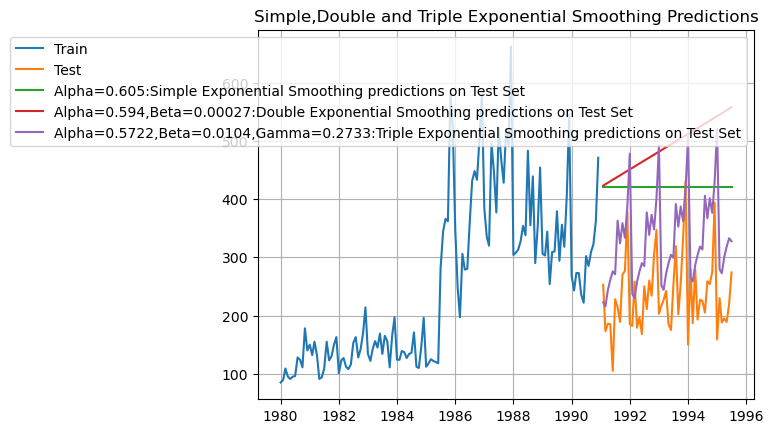

In [65]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['YearMonth'],train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')

plt.plot(test['YearMonth'],SES_predict, label='Alpha=0.605:Simple Exponential Smoothing predictions on Test Set')
plt.plot(test['YearMonth'],DES_predict, label='Alpha=0.594,Beta=0.00027:Double Exponential Smoothing predictions on Test Set')
plt.plot(test['YearMonth'],TES_predict, label='Alpha=0.5722,Beta=0.0104,Gamma=0.2733:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [66]:
MAPE_TES=MAPE(test['Shoe_Sales'].values,TES_predict.values)
print('TES MAPE:',MAPE_TES)

TES MAPE: 49.90672694891035


In [67]:
#calculating RMSE
RMSE_TES_sklearn=mean_squared_error(test['Shoe_Sales'].values,TES_predict.values,squared=False)
print('TES additive RMSE(calculated using sklearn):',RMSE_TES_sklearn)
#different way to calculate RMSE
RMSE_TES_sm=em.rmse(test['Shoe_Sales'].values,TES_predict.values)
print('TES additive RMSE (calculated using statsmodels):',RMSE_TES_sm)

TES additive RMSE(calculated using sklearn): 126.38763305091122
TES additive RMSE (calculated using statsmodels): 126.38763305091122


In [68]:
#printing results
resultsDf1_TES = pd.DataFrame({'RMSE (sklearn)': [RMSE_TES_sklearn],'RMSE (statsmodel)': [RMSE_TES_sm],'MAPE': [MAPE_TES]},index=['Alpha=0.5722,Beta=0.0104,Gamma=0.2733,TES Additive'])

resultsDf1_temp = pd.concat([resultsDf1_SES, resultsDf1_DES,resultsDf1_TES])
resultsDf1_temp

,RMSE (sklearn),RMSE (statsmodel),MAPE
"Alpha=0.605,SES",195.894595,195.894595,91.420760
"Alpha=0.594,Beta=0.00027,DES",264.824827,264.824827,122.325284
"Alpha=0.5722,Beta=0.0104,Gamma=0.2733,TES Additive",126.387633,126.387633,49.906727


Inference Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

## Holt-Winters - ETS(A, M, M) - Holt Winter's linear method with multiplicative error and seasonal

In [69]:
# Initializing the Triple Exponential Smoothing Model
model_TES_m = ExponentialSmoothing(train['Shoe_Sales'],trend='add',seasonal='multiplicative',seasonal_periods=12,initialization_method='estimated')
# Fitting the model
model_TES_m = model_TES_m.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_m.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6009868693481561, 'smoothing_trend': 0.006156909298740214, 'smoothing_seasonal': 0.17574086651628373, 'damping_trend': nan, 'initial_level': 107.69608365185793, 'initial_trend': 0.4232661374510192, 'initial_seasons': array([1.09755031, 0.99553258, 1.21255323, 1.38802376, 1.29807702,
       1.10890294, 1.22578614, 1.43128568, 1.70333676, 1.4459007 ,
       1.7104661 , 1.94336275]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [70]:
# Forecasting using this model for the duration of the test set
TES_predict_m =  model_TES_m.forecast(len(test['Shoe_Sales']))
TES_predict_m

132    263.531912
133    245.139749
134    259.792279
135    276.337606
136    272.442200
137    262.642621
138    345.145636
139    324.141924
140    347.267953
141    322.201675
142    388.197274
143    477.651191
144    271.950542
145    252.950042
146    268.047492
147    285.095376
148    281.053773
149    270.922630
150    355.998105
151    334.307334
152    358.130230
153    332.253696
154    400.276816
155    492.475831
156    280.369172
157    260.760335
158    276.302705
159    293.853147
160    289.665345
161    279.202640
162    366.850574
163    344.472744
164    368.992508
165    342.305718
166    412.356359
167    507.300471
168    288.787802
169    268.570628
170    284.557919
171    302.610917
172    298.276918
173    287.482649
174    377.703043
175    354.638154
176    379.854785
177    352.357740
178    424.435901
179    522.125111
180    297.206432
181    276.380921
182    292.813132
183    311.368687
184    306.888491
185    295.762659
dtype: float64

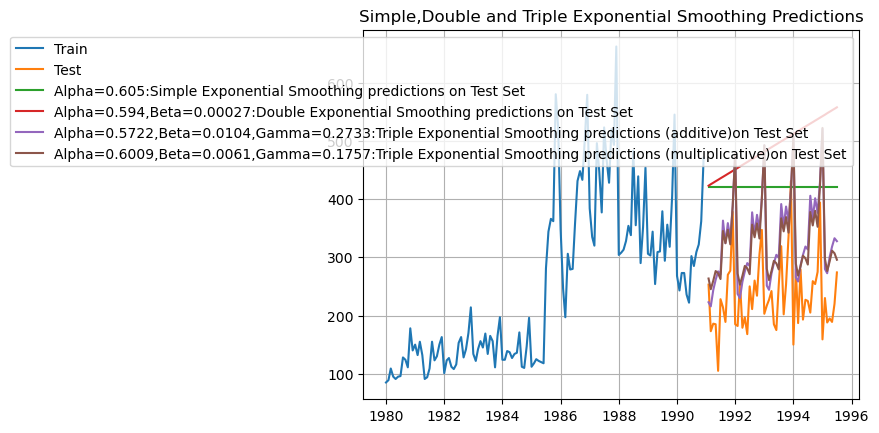

In [71]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['YearMonth'],train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')

plt.plot(test['YearMonth'],SES_predict, label='Alpha=0.605:Simple Exponential Smoothing predictions on Test Set')
plt.plot(test['YearMonth'],DES_predict, label='Alpha=0.594,Beta=0.00027:Double Exponential Smoothing predictions on Test Set')
plt.plot(test['YearMonth'],TES_predict, label='Alpha=0.5722,Beta=0.0104,Gamma=0.2733:Triple Exponential Smoothing predictions (additive)on Test Set')
plt.plot(test['YearMonth'],TES_predict_m, label='Alpha=0.6009,Beta=0.0061,Gamma=0.1757:Triple Exponential Smoothing predictions (multiplicative)on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

TES multiplicative is also showing same graph

In [72]:
#Calculating MAPE
MAPE_TES_m=MAPE(test['Shoe_Sales'].values,TES_predict_m.values)
print('TES MAPE:',MAPE_TES_m)

TES MAPE: 48.032997724305226


In [73]:
#calculating RMSE
RMSE_TESm_sklearn=mean_squared_error(test['Shoe_Sales'].values,TES_predict_m.values,squared=False)
print('TES multiplicative RMSE(calculated using sklearn):',RMSE_TESm_sklearn)
#different way to calculate RMSE
RMSE_TESm_sm=em.rmse(test['Shoe_Sales'].values,TES_predict_m.values)
print('TES multiplicative RMSE (calculated using statsmodels):',RMSE_TESm_sm)

TES multiplicative RMSE(calculated using sklearn): 122.17854463685187
TES multiplicative RMSE (calculated using statsmodels): 122.17854463685187


In [74]:
#printing all the result
resultsDf1_TESm = pd.DataFrame({'RMSE (sklearn)': [RMSE_TESm_sklearn],'RMSE (statsmodel)': [RMSE_TESm_sm],'MAPE': [MAPE_TES_m]},index=['Alpha=0.6009,Beta=0.0061,Gamma=0.1757,TES Multiplicative'])

resultsDf1_temp = pd.concat([resultsDf1_SES, resultsDf1_DES,resultsDf1_TES,resultsDf1_TESm])
resultsDf1_temp

,RMSE (sklearn),RMSE (statsmodel),MAPE
"Alpha=0.605,SES",195.894595,195.894595,91.420760
"Alpha=0.594,Beta=0.00027,DES",264.824827,264.824827,122.325284
"Alpha=0.5722,Beta=0.0104,Gamma=0.2733,TES Additive",126.387633,126.387633,49.906727
"Alpha=0.6009,Beta=0.0061,Gamma=0.1757,TES Multiplicative",122.178545,122.178545,48.032998


## Linear Regression

For this particular linear regression, we are going to regress the 'Shoe Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [75]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [76]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [77]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,YearMonth,Shoe_Sales,Year,Month,time
0,1980-01-01,85,1980,1,1
1,1980-02-01,89,1980,2,2
2,1980-03-01,109,1980,3,3
3,1980-04-01,95,1980,4,4
4,1980-05-01,91,1980,5,5


Last few rows of Training Data


,YearMonth,Shoe_Sales,Year,Month,time
127,1990-08-01,285,1990,8,128
128,1990-09-01,309,1990,9,129
129,1990-10-01,322,1990,10,130
130,1990-11-01,362,1990,11,131
131,1990-12-01,471,1990,12,132


First few rows of Test Data


,YearMonth,Shoe_Sales,Year,Month,time
133,1991-02-01,253,1991,2,133
134,1991-03-01,173,1991,3,134
135,1991-04-01,186,1991,4,135
136,1991-05-01,185,1991,5,136
137,1991-06-01,105,1991,6,137


Last few rows of Test Data


,YearMonth,Shoe_Sales,Year,Month,time
182,1995-03-01,188,1995,3,182
183,1995-04-01,195,1995,4,183
184,1995-05-01,189,1995,5,184
185,1995-06-01,220,1995,6,185
186,1995-07-01,274,1995,7,186


Now that our training and test data has been modified, let us go ahead use LinearRegression−−−−−−−−−−−−−−− to build the model on the training data and test the model on the test data.

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()

In [80]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'])

LinearRegression()

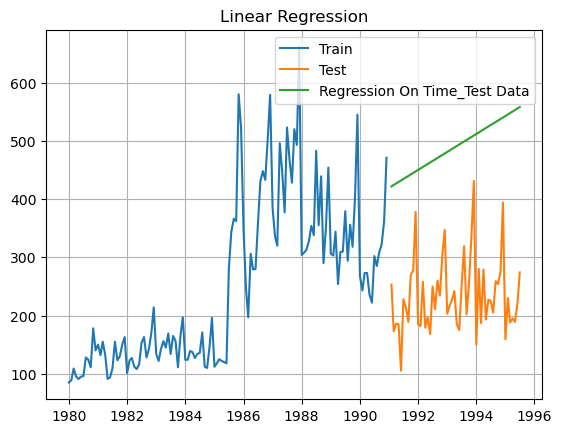

In [84]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(train['YearMonth'], train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')
plt.plot(test['YearMonth'],LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression')
plt.legend(loc='best')
plt.grid();

In [85]:
#Calculating MAPE
MAPE_LR=MAPE(LinearRegression_test['Shoe_Sales'],test_predictions_model1)
print('LR MAPE:',MAPE_LR)

LR MAPE: 122.14075782294853


In [86]:
#calculating RMSE
RMSE_LR_sklearn=mean_squared_error(LinearRegression_test['Shoe_Sales'],test_predictions_model1,squared=False)
print('LR RMSE(calculated using sklearn):',RMSE_LR_sklearn)
#different way to calculate RMSE
RMSE_LR_sm=em.rmse(LinearRegression_test['Shoe_Sales'],test_predictions_model1)
print('LR RMSE (calculated using statsmodels):',RMSE_LR_sm)

LR RMSE(calculated using sklearn): 264.51679449469304
LR RMSE (calculated using statsmodels): 264.51679449469304


In [87]:
resultsDf_LR = pd.DataFrame({'RMSE (sklearn)': [RMSE_LR_sklearn],'RMSE (statsmodel)': [RMSE_LR_sm],'MAPE': [MAPE_LR]},index=['Linear RegressionOnTime'])
resultsDf_LR

,RMSE (sklearn),RMSE (statsmodel),MAPE
Linear RegressionOnTime,264.516794,264.516794,122.140758


### NAIVE BAYES

In [88]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [89]:
#Calculating predicted value and storing it in a new column name 'naive'
NaiveModel_test['naive']=NaiveModel_test['Shoe_Sales'].shift(1)

In [90]:
#Keeping the first row same to avoid NAN value
NaiveModel_test['naive'].iloc[0]=NaiveModel_test['Shoe_Sales'].iloc[0]

In [91]:
NaiveModel_test['naive'].head()

133    253.0
134    253.0
135    173.0
136    186.0
137    185.0
Name: naive, dtype: float64

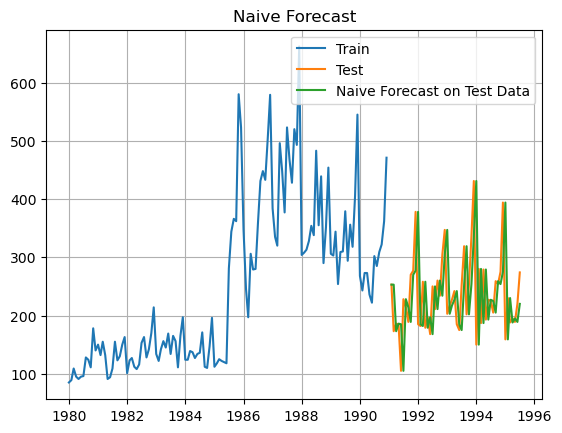

In [92]:
#Plotting the data and predicted data on graph
plt.plot(train['YearMonth'],NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')

plt.plot(test['YearMonth'],NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [93]:
#Calculating MAPE
MAPE_NA=MAPE(NaiveModel_test['Shoe_Sales'],NaiveModel_test['naive'])
print('Naive Approach MAPE:',MAPE_NA)

Naive Approach MAPE: 29.172387135547105


In [94]:
#calculating RMSE
RMSE_NA_sklearn=mean_squared_error(NaiveModel_test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
print('Naive Approach RMSE(calculated using sklearn):',RMSE_NA_sklearn)
#different way to calculate RMSE
RMSE_NA_sm=em.rmse(NaiveModel_test['Shoe_Sales'],NaiveModel_test['naive'])
print('Naive Approach RMSE (calculated using statsmodels):',RMSE_NA_sm)

Naive Approach RMSE(calculated using sklearn): 84.64840135437794
Naive Approach RMSE (calculated using statsmodels): 84.64840135437794


In [95]:
#printing all the results
resultsDf_NA = pd.DataFrame({'RMSE (sklearn)': [RMSE_NA_sklearn],'RMSE (statsmodel)': [RMSE_NA_sm],'MAPE': [MAPE_NA]},index=['Naive Approach'])
resultsDf_temp = pd.concat([resultsDf1_temp,resultsDf_LR, resultsDf_NA])
resultsDf_temp

,RMSE (sklearn),RMSE (statsmodel),MAPE
"Alpha=0.605,SES",195.894595,195.894595,91.420760
"Alpha=0.594,Beta=0.00027,DES",264.824827,264.824827,122.325284
"Alpha=0.5722,Beta=0.0104,Gamma=0.2733,TES Additive",126.387633,126.387633,49.906727
"Alpha=0.6009,Beta=0.0061,Gamma=0.1757,TES Multiplicative",122.178545,122.178545,48.032998
Linear RegressionOnTime,264.516794,264.516794,122.140758
Naive Approach,84.648401,84.648401,29.172387


# 1.5)Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

#### Stationarity can be checked using Augmented dickey Fuller Test .  

<b> The Augmented Dickey-Fuller , test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
    
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.  
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [96]:
#importing adfuller from statsmodel library to check stationarity
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Shoe_Sales'])#Stationarity check on train time series data
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])
print('Critical Values:')
for dftest, value in dftest[4].items():
 print('\t%s: %.3f' % (dftest, value),'\n')

DF test statistic is -1.717
DF test p-value is 0.4222
Critical Values:
	1%: -3.469 

	5%: -2.878 

	10%: -2.576 



From the test we can see that ADF statistics value is more than critical values so we fell to reject the null hypothesis. and p value is also greater than 0.05,so we fell to reject the null hypothesis.
The dataset is non stationary.

Now we need to change the data to stationary by log transformation

###  Square root transformation to change stationarity

In [97]:
df_sqrt=np.sqrt(df['Shoe_Sales'])
df_diff=df_sqrt.diff().dropna()

In [98]:
df_test_adf=adfuller(df_diff)#Stationarity check on train time series data
df_test_adf
print('DF test statistic is %3.3f' %df_test_adf[0])
print('DF test p-value is %1.4f' %df_test_adf[1])
print('Critical Values:')
for df_test_adf, value in df_test_adf[4].items():
 print('\t%s: %.3f' % (df_test_adf, value),'\n')

DF test statistic is -3.375
DF test p-value is 0.0119
Critical Values:
	1%: -3.469 

	5%: -2.878 

	10%: -2.576 



From the test we can see that ADF statistic is less than the critical values which means we can reject the null hypothesis.P value is also less than 0.05 which means we can reject the null hypothesis.
The data is stationary.

## 1.6)Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

<b>Auto Regressive(AR) Models</b>
Autoregression means regression of a variable on itself which means Autoregressive models use previous time period values to predict the current time period values. One of the fundamental assumptions of an AR model is that the time series is assumed to be a stationary process. An AR(p) model (Auto-Regressive model of order p) can be written as:

yt = φ1yt−1+φ2yt−2+……+φpyt−p+εt εt is an error term which is an independent and identically distributed random variable (or in other words, a white noise) with the parameters mean = 0 and standard deviation = σ The φ are regression coefficients multiplied by lagged time series variable, which captures the effect of the input variable on the output, provided intermediate values do not change.

Choose the order 'p' of AR model
We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.

For an AR model, 2 ways to identify order of 'p':

<b> 1) PACF Approach :</b>   the PACF method where the (Partial Auto Correlation Function) values cut off and become zero after a certain lag. PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken as the order of AR as ‘p’. This can be seen from a PACF plot.

If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.

If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…

Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between 
 and 
 holding fixed.  
 <b> 2) Lowest AIC Approach : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.<b>

The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. AIC is calculated from:

the number of independent variables used to build the model.
the maximum likelihood estimate of the model (how well the model reproduces the data).
The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables.

#### Using the 2nd method(Lowest AIC) to compare different orders of 'p'

In [99]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)

### Moving Average(MA) Models
Where 
  time series variable, θ are numeric coefficients multiplied to lagged residuals and ε is the residual term considered as a purely random process with mean 0, variance 
 and  
 = 0.
Choose the order 'q' of MA model
We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.

For a MA model,

<b>1) ACF Approach :</b> ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.

<b>2) Lowest AIC Approach :</b> the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered.

Choose the order 'q' of MA model We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models. For a MA model,

<b>ACF Approach :</b> ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.

<b>Lowest AIC Approach :</b> the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered.

<b>Using the 2nd method(Lowest AIC) to compare different orders of 'q'<b>

In [100]:
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)


ACF(0)=1

ACF(1)=PACF(1)

Parameter (p, d, q) estimation matrix for estimating parameters towards building AR / ARMA / ARIMA / SARIMA models

In [101]:
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [102]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [103]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [104]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [105]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [106]:
df_train_sqrt=np.sqrt(train['Shoe_Sales'])

#square root transformation on the training data to make the time series stationary as we did with full data

In [107]:
df_test_sqrt=np.sqrt(test['Shoe_Sales'])

#square root vbn transformation on the training data to make the time series stationary as we did with full data

AR Model

Autoregressive models use previous time period values to predict the current time period values.

AR Model building to estimate best 'p' ( Lowest AIC Approach )

In [108]:
#Creating an empty dataframe with column names 
AR_AIC=pd.DataFrame(columns=['param','AIC'])
AR_AIC

,param,AIC


In [109]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    AR_model = ARIMA(df_train_sqrt,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,AR_model.aic))
    AR_AIC = AR_AIC._append({'param':param, 'AIC': AR_model.aic}, ignore_index=True)


ARIMA(1, 0, 0) - AIC:564.3968126475165
ARIMA(2, 0, 0) - AIC:562.0922808486534
ARIMA(3, 0, 0) - AIC:560.0458555501488


Building AR model with best 'p' parameter

In [110]:
#p=3 has the lowest AIC value
AR_model1=ARIMA(df_train_sqrt,order=(3,0,0)).fit
print(AR_model.summary().tables[0])
print(AR_model.summary().tables[1])
print(AR_model.summary().tables[2])

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -275.023
Date:                Tue, 14 May 2024   AIC                            560.046
Time:                        22:56:37   BIC                            574.460
Sample:                             0   HQIC                           565.903
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2093      2.113      7.197      0.000      11.067      19.351
ar.L1          0.6982      0.080      8.762      0.000       0.542       0.854
ar.L2          0.0555      0.120      0.463      0.6

In [111]:
#predicting of data 

pre_AR = AR_model1().predict(start=133,end=186 , full_results=True)
#squaring it to plot it in the same axis
pred_AR=np.square(pre_AR)

In [112]:
#Calculating MAPE
MAPE_AR=MAPE(test['Shoe_Sales'],pred_AR)
print('AR MAPE:',MAPE_AR)

AR MAPE: 39.94486632014559


In [113]:
#calculating RMSE
RMSE_AR_sklearn=mean_squared_error(test['Shoe_Sales'],pred_AR,squared=False)
print('Auto Regression RMSE(calculated using sklearn):',RMSE_AR_sklearn)
#different way to calculate RMSE
RMSE_AR_sm=em.rmse(test['Shoe_Sales'],pred_AR)
print('Auto Regression RMSE (calculated using statsmodels):',RMSE_AR_sm)

Auto Regression RMSE(calculated using sklearn): 99.35376352725396
Auto Regression RMSE (calculated using statsmodels): 99.35376352725396


In [114]:
resultsDf_AR = pd.DataFrame({'RMSE (sklearn)': [RMSE_AR_sklearn],'RMSE (statsmodel)': [RMSE_AR_sm],'MAPE': [MAPE_AR]},index=['AutoRegression(3,0,0)'])
resultsDf_AR

,RMSE (sklearn),RMSE (statsmodel),MAPE
"AutoRegression(3,0,0)",99.353764,99.353764,39.944866


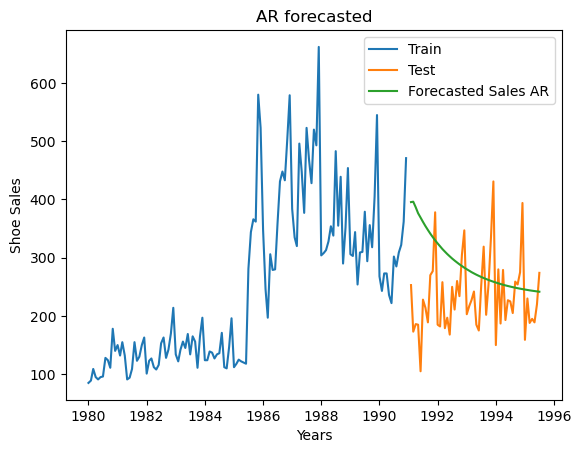

In [118]:
plt.plot(train['YearMonth'],train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')
plt.plot(test['YearMonth'],pred_AR,label='Forecasted Sales AR')
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.legend(loc='best')
plt.title('AR forecasted')
plt.show()
plt.close()

### ARMA Model
Improving AutoRegressive Models through Moving Average Forecasts.  
ARMA models consist of 2 components:-  
AR model: The data is modeled based on past observations.  
MA model: Previous forecast errors are incorporated into the model.  
<b>ARMA Model building to estimate best 'p' , 'q' ( Lowest AIC Approach )<b>

In [119]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [120]:
#Calculating AIC for all the parameters
for param in pdq_arma:
    ARMA_model = ARIMA(df_train_sqrt,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC._append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:559.6878970366249
ARIMA(1, 0, 2) - AIC:559.0818623671007
ARIMA(1, 0, 3) - AIC:560.5468879798108


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1) - AIC:557.8656542694043
ARIMA(2, 0, 2) - AIC:559.8586524429913
ARIMA(2, 0, 3) - AIC:561.8766937195953
ARIMA(3, 0, 1) - AIC:559.860718616236
ARIMA(3, 0, 2) - AIC:560.4164426614572
ARIMA(3, 0, 3) - AIC:557.5411807856403


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [121]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(3, 0, 3)",557.541181
3,"(2, 0, 1)",557.865654
1,"(1, 0, 2)",559.081862
0,"(1, 0, 1)",559.687897
4,"(2, 0, 2)",559.858652
6,"(3, 0, 1)",559.860719
7,"(3, 0, 2)",560.416443
2,"(1, 0, 3)",560.546888
5,"(2, 0, 3)",561.876694


(3,0,3)has the lowest AIC value.  
Building ARMA with the best parameter and lowest AIC.

In [122]:
#p=3,q=3 has the lowest AIC value
ARMA_model1=ARIMA(df_train_sqrt,order=(3,0,3)).fit
print(ARMA_model.summary().tables[0])
print(ARMA_model.summary().tables[1])
print(ARMA_model.summary().tables[2])

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -270.771
Date:                Tue, 14 May 2024   AIC                            557.541
Time:                        23:00:20   BIC                            580.604
Sample:                             0   HQIC                           566.913
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0886      2.279      6.621      0.000      10.622      19.555
ar.L1         -0.3077      0.111     -2.767      0.006      -0.526      -0.090
ar.L2          0.4236      0.058      7.276      0.0

In [123]:
#predicting of data 

pre_ARMA = ARMA_model1().predict(start=133,end=186 , full_results=True)
#squaring it to plot it in the same axis
pred_ARMA=np.square(pre_ARMA)

C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [124]:
#Calculating MAPE
MAPE_ARMA=MAPE(test['Shoe_Sales'],pred_ARMA)
print('ARMA MAPE:',MAPE_ARMA)

ARMA MAPE: 40.2921322267284


In [125]:
#calculating RMSE
RMSE_ARMA_sklearn=mean_squared_error(test['Shoe_Sales'],pred_ARMA,squared=False)
print('Auto Regression Moving Average RMSE(calculated using sklearn):',RMSE_ARMA_sklearn)
#different way to calculate RMSE
RMSE_ARMA_sm=em.rmse(test['Shoe_Sales'],pred_ARMA)
print('Auto Regression Moving Average RMSE (calculated using statsmodels):',RMSE_ARMA_sm)

Auto Regression Moving Average RMSE(calculated using sklearn): 99.07071607091686
Auto Regression Moving Average RMSE (calculated using statsmodels): 99.07071607091686


In [138]:
resultsDf_ARMA = pd.DataFrame({'RMSE (sklearn)': [RMSE_ARMA_sklearn],'RMSE (statsmodel)': [RMSE_ARMA_sm],'MAPE': [MAPE_ARMA]},index=['AutoRegression Moving Average(ARMA(3,0,3)'])
result_tempARIMA=pd.concat([resultsDf_AR,resultsDf_ARMA])
result_tempARIMA

,RMSE (sklearn),RMSE (statsmodel),MAPE
"AutoRegression(3,0,0)",99.353764,99.353764,39.944866
"AutoRegression Moving Average(ARMA(3,0,3)",99.070716,99.070716,40.292132


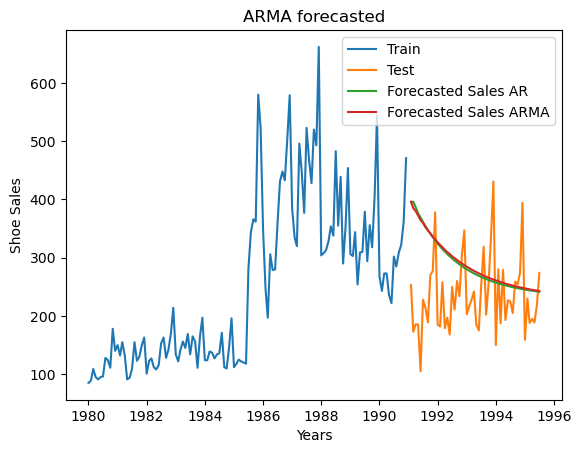

In [129]:
plt.plot(train['YearMonth'],train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')
plt.plot(test['YearMonth'],pred_AR,label='Forecasted Sales AR')
plt.plot(test['YearMonth'],pred_ARMA,label='Forecasted Sales ARMA')
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.legend(loc='best')
plt.title('ARMA forecasted')
plt.show()
plt.close()

### ARIMA Model
<b>What is ARIMA:<b>  
   
An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time-series data to better understand the data set or predict future trends. A statistical model is autoregressive if it predicts future values based on past values.
We can split the Arima term into three terms, <b>AR, I, MA</b>:

AR(p) stands for the autoregressive model, the p parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead.

I(d) is the differencing part, the d parameter tells how many differencing orders are going to be used to make the series stationary.

MA(q) stands for moving average model, the q is the number of lagged forecast error terms in the prediction equation.

In [130]:
#Creating a dataframe containing 2 column -Param(parameter) and AIC value
ARIMA_AIC=pd.DataFrame(columns=['param','AIC'])
ARIMA_AIC

,param,AIC


In [131]:
#Calculating AIC for all the parameters
for param in pdq:
    ARIMA_model=ARIMA(df_train_sqrt,order=param).fit()#fitting into ARIMA model
    print('ARIMA{} -AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC=ARIMA_AIC._append({'param':param,'AIC':ARIMA_model.aic},ignore_index=True)

ARIMA(1, 0, 1) -AIC:559.6878970366249
ARIMA(1, 0, 2) -AIC:559.0818623671007
ARIMA(1, 0, 3) -AIC:560.5468879798108
ARIMA(1, 1, 1) -AIC:548.993092203689
ARIMA(1, 1, 2) -AIC:550.9816911225
ARIMA(1, 1, 3) -AIC:552.7385774400692


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1) -AIC:557.8656542694043
ARIMA(2, 0, 2) -AIC:559.8586524429913
ARIMA(2, 0, 3) -AIC:561.8766937195953
ARIMA(2, 1, 1) -AIC:550.9849721980772
ARIMA(2, 1, 2) -AIC:536.6281158694462


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) -AIC:529.9575290450741
ARIMA(3, 0, 1) -AIC:559.860718616236
ARIMA(3, 0, 2) -AIC:560.4164426614572


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) -AIC:557.5411807856403
ARIMA(3, 1, 1) -AIC:555.3819275243375


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) -AIC:528.8377900800544
ARIMA(3, 1, 3) -AIC:545.3865762313153


In [132]:
#Sorting AIC values of ARIMA model
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
16,"(3, 1, 2)",528.837790
11,"(2, 1, 3)",529.957529
10,"(2, 1, 2)",536.628116
17,"(3, 1, 3)",545.386576
3,"(1, 1, 1)",548.993092
4,"(1, 1, 2)",550.981691
9,"(2, 1, 1)",550.984972
5,"(1, 1, 3)",552.738577
15,"(3, 1, 1)",555.381928
14,"(3, 0, 3)",557.541181


(3,1,2)has the lowest AIC value.Now ARIMA model will be predicted on Parameter(3,1,2)

In [133]:
#p=3,d=1,q=2 has the lowest AIC value
ARIMA_model1=ARIMA(df_train_sqrt,order=(3,1,2)).fit()
print(ARIMA_model1.summary().tables[0])
print(ARIMA_model1.summary().tables[1])
print(ARIMA_model1.summary().tables[2])

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -258.419
Date:                Tue, 14 May 2024   AIC                            528.838
Time:                        23:01:43   BIC                            546.089
Sample:                             0   HQIC                           535.848
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3453      0.090     -3.857      0.000      -0.521      -0.170
ar.L2         -0.9996      0.010   -100.110      0.000      -1.019      -0.980
ar.L3         -0.3422      0.080     -4.283      0.0

C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [134]:
#predicting of data 

pre_ARIMA = ARIMA_model1.predict(start=133,end=186 , full_results=True)
#squaring it to plot it in the same axis
pred_ARIMA=np.square(pre_ARIMA)

In [135]:
#Calcuating MAPE
MAPE_ARIMA=MAPE(test['Shoe_Sales'],pred_ARIMA)
MAPE_ARIMA

84.21653124542891

In [136]:
#calculating RMSE
RMSE_ARIMA_sklearn=mean_squared_error(test['Shoe_Sales'],pred_ARIMA,squared=False)
print('ARIMA RMSE(calculated using sklearn):',RMSE_ARIMA_sklearn)
#different way to calculate RMSE
RMSE_ARIMA_sm=em.rmse(test['Shoe_Sales'],pred_ARIMA)
print('ARIMA RMSE (calculated using statsmodels):',RMSE_ARIMA_sm)

ARIMA RMSE(calculated using sklearn): 182.160170240246
ARIMA RMSE (calculated using statsmodels): 182.160170240246


In [139]:
resultsDf_ARIMA = pd.DataFrame({'RMSE (sklearn)': [RMSE_ARIMA_sklearn],'RMSE (statsmodel)': [RMSE_ARIMA_sm],'MAPE': [MAPE_ARIMA]},index=['ARIMA(3,1,2)'])
result_tempARIMA=pd.concat([resultsDf_AR,resultsDf_ARMA,resultsDf_ARIMA])
result_tempARIMA

,RMSE (sklearn),RMSE (statsmodel),MAPE
"AutoRegression(3,0,0)",99.353764,99.353764,39.944866
"AutoRegression Moving Average(ARMA(3,0,3)",99.070716,99.070716,40.292132
"ARIMA(3,1,2)",182.160170,182.160170,84.216531


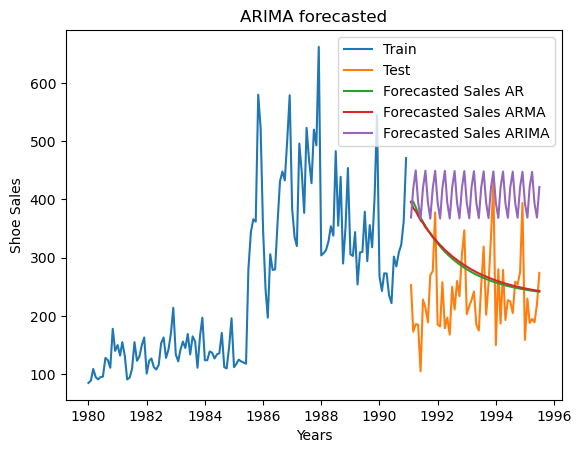

In [140]:
#Plotting the forecasted value
plt.plot(train['YearMonth'],train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')
plt.plot(test['YearMonth'],pred_AR,label='Forecasted Sales AR')
plt.plot(test['YearMonth'],pred_ARMA,label='Forecasted Sales ARMA')
plt.plot(test['YearMonth'],pred_ARIMA,label='Forecasted Sales ARIMA')
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.legend(loc='best')
plt.title('ARIMA forecasted')
plt.show()
plt.close()

### SARIMA Model


In [141]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [142]:
#getting all the possible values 
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [143]:
#Making a dataframe with parametre,seasonal and AIC column
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

#calculating SARIMA AIC values using for loop
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = SARIMAX(df_train_sqrt.values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:558.11664757497
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:483.00057302773087
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:439.33609386795985


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:2443.618499971765
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:467.57271600041435
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:458.4776996414885
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:415.04495700891766


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3296.3568064465826
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:423.7795183054959
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:420.82184919189916
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:415.9437907359847
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3558.3310452059804
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:376.8736089975754
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:378.6441273365681
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:378.444230686001
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3507.329977781484
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:545.8019527565993
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:472.14586214919547
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:427.11143392640736
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3403.303046456137
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:456.4086776570755
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:443.29317151968434
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:402.62733299182804


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3278.2952382428193
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:414.5394580361885
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:411.22285663140747
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:403.6974744777321


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3178.5144301144915
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:371.2650275005238
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:372.3642197711758
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:372.0237304092355


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3138.0159277208136
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:540.7810893379922
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:469.8062043832644
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:425.80064136312257


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:3603.024734598379
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:458.3145603015754
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:441.672255673465
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:401.3191080087423


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3767.913035507474
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:416.28568758539825
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:412.88185707255036
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:402.471855293153


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3679.800851373156
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:372.7892086045357
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:373.57647008008246
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:372.9944963161209


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3629.621071468842
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:538.6239251307069
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:465.048774021125
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:422.5556858456757
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:2079.112516037626
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:456.7804151611096
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:437.31168666295287
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:395.894289726553


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3394.627596836689
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:416.08542884158163
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:412.27338936049074
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:397.59580084761404
SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3298.864890213171
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:373.6928304357066
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:374.5220744574377
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:373.4961407237661
SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3257.8829314212057
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:553.3047599475924
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:477.43143506177626
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:431.76185907387253


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3960.201545352649
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:452.58336674707414
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:444.5305364103644
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:403.80044162922


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:4118.988912290703
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:410.182150775094
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:406.81087045704777
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:405.3248665952601


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:4027.6104899934635
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:367.2888616268036
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:367.6230156569539
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:366.9465070116344


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3977.6060849963355
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:542.5684915920048
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:470.46077522463713
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:428.2360769776394


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3448.2394003862237
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:454.4263365793304
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:443.44324226543216
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:403.0012064436534
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3614.0061618453033
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:412.128714820426
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:409.08063722854854
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:404.32766675333755
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3524.60632005771
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:369.2584100666091
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:369.619203413052
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:368.93753931332037
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3474.1668933389733
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:541.2377473416068
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:468.8599003070124
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:425.686188277077


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3279.4223477622595
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:455.91094927532714
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:442.6213502721837
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:402.2539704918315


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3028.5025517195863
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:413.9652288446493
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:410.00321173871055
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:403.52317337021947
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3127.0473888836304
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:371.24293728802553
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:371.49847791046983
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:371.4385603577233


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:2890.8122641447344
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:540.1840444787179
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:466.80799353772335
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:424.0233164009081


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3360.1680481626504
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:455.2460070104378
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:438.97628001872454
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:397.009219616985


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3310.6237843660588
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:414.4803257000356
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:410.0475260530048
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:398.7290376103418


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2641.114122419971
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:372.3966609051054
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:372.56419757308544
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:371.33965179014615


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3174.3041608076824
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:546.2792955845823
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:478.0928842130189
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:433.2158617129847


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:2731.6880640240925
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:451.74460003619356
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:443.6679838849288
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:405.6853112714042


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:2870.661971129611
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:409.34920508865537
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:405.53960183938176
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:404.40199694360405


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:2791.0175617305763
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:366.44686931501343
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:366.60558270749857
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:365.9399600676763


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:2700.434125164694
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:544.5684926257376
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:471.7775810016238
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:428.20589332105334
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:2635.4082882420307
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:451.3000321548671
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:445.6501428841805
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:404.51706114915606


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3208.915305446684
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:410.01975690041695
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:407.41408227922796
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:406.3311861462473


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3300.1208987280343
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:368.4468392474842
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:368.60478110812676
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:368.41809048629955


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3069.769414482078
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:527.368163265755
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:470.69414933331745
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:440.93252773852697
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:2692.5756837603967
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:454.45952575403027
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:462.18372115814526
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:402.68853515451366


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3473.3609619359954
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:429.67073502605643
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:424.0561480164137
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:420.6339679296493
SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3470.9689482212707
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:371.2229843447366
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:384.1328346990898
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:369.8564884059522


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3327.964776096551
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:516.8429194109343
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:468.75633243804623
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:426.0048123301024


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3192.4714543181954
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:454.4290979221352
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:440.93726058440615
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:398.9968417322504


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3314.0763668771556
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:413.1158762895437
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:408.9637251377479
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:400.7211562275403


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3216.1346041506745
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:370.7146674358605
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:371.29773948851187
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:370.0672968078962


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3177.3711670340153
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:543.3894423904385
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:477.252584200489
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:432.60622758277043
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3487.1678274634123
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:448.74927112627466
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:442.8188869155691
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:407.40948694254934


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3146.1351776572396
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:407.7327472766393
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:404.6655439850415
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:403.45754408862206


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3314.8077518060663
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:364.92733214411095
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:365.0512905336855
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:364.3660791729763


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:2941.5971190803466
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:545.3677081373412
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:476.046572406987
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:431.2400917643861


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3109.9337209688847
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:449.13287865512575
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:443.49238691440286
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:404.9986830877728
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3210.9153073820708
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:408.62720280572466
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:404.3677568708866
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:403.315153248701


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3087.681992698008
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:366.62817362929417
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:367.08879776656505
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:365.64246655187276


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3038.7587235774113
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:550.7305167614045
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:480.73043285836366
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:428.44112107265425


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:2843.0485830440593
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:450.60277116203713
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:445.46641383697846
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:403.02848952147326


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3561.420132720934
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:410.17841837344645
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:406.1823144548456
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:405.0914105450846
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3080.357533901489
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:368.2379199408824
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:368.8925461801515
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:367.247130603635
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3419.6729875425126
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:516.3591440956334
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:467.332389107182
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:416.52866113638174


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3671.1953396502868
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:452.0493053529351
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:442.4145191976603
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:400.934992335539


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3807.780737640164
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:412.14229958891525
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:407.5537937891572
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:402.6747840820293


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3719.181065388495
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:368.7202867123117
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:369.5748407630376
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:368.2970806990307
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3671.0256224814134


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [144]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
206,"(3, 1, 0)","(3, 0, 2, 12)",364.366079
204,"(3, 1, 0)","(3, 0, 0, 12)",364.927332
205,"(3, 1, 0)","(3, 0, 1, 12)",365.051291
222,"(3, 1, 1)","(3, 0, 2, 12)",365.642467
142,"(2, 1, 0)","(3, 0, 2, 12)",365.939960


(3,1,0)(3,0,2,12)has the lowest AIC value.

In [145]:
#printing SARIMA report with the parameter having lowest AIC value
SARIMA_model1 = SARIMAX(df_train_sqrt.values,
                                order=(3, 1, 0),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit(maxiter=1000)

print(SARIMA_model1.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 0)x(3, 0, [1, 2], 12)   Log Likelihood                -173.183
Date:                                 Tue, 14 May 2024   AIC                            364.366
Time:                                         23:08:16   BIC                            387.062
Sample:                                              0   HQIC                           373.526
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3540      0.095     -3.741      0.000      -0.539      -0

In [146]:
#predicting of data 

pre_SARIMA = SARIMA_model1.predict(start=133,end=186 , dynamic=True)
#squaring it to plot it in the same axis
pred_SARIMA=(pre_SARIMA*pre_SARIMA)

C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [147]:
#Calcuating MAPE
MAPE_SARIMA=MAPE(test['Shoe_Sales'],pred_SARIMA)
MAPE_SARIMA

38.983993532156866

In [148]:
#calculating RMSE
RMSE_SARIMA_sklearn=mean_squared_error(test['Shoe_Sales'],pred_SARIMA,squared=False)
print('SARIMA RMSE(calculated using sklearn):',RMSE_SARIMA_sklearn)
#different way to calculate RMSE
RMSE_SARIMA_sm=em.rmse(test['Shoe_Sales'],pred_SARIMA)
print('SARIMA RMSE (calculated using statsmodels):',RMSE_SARIMA_sm)

SARIMA RMSE(calculated using sklearn): 92.1066303464584
SARIMA RMSE (calculated using statsmodels): 92.1066303464584


In [149]:
#printing all the results
resultsDf_SARIMA = pd.DataFrame({'RMSE (sklearn)': [RMSE_SARIMA_sklearn],'RMSE (statsmodel)': [RMSE_SARIMA_sm],'MAPE': [MAPE_SARIMA]},index=['SARIMA(3,1,2)(3,0,2,12)'])
result_tempSARIMA=pd.concat([resultsDf_AR,resultsDf_ARMA,resultsDf_ARIMA,resultsDf_SARIMA])
result_tempSARIMA

,RMSE (sklearn),RMSE (statsmodel),MAPE
"AutoRegression(3,0,0)",99.353764,99.353764,39.944866
"AutoRegression Moving Average(ARMA(3,0,3)",99.070716,99.070716,40.292132
"ARIMA(3,1,2)",182.160170,182.160170,84.216531
"SARIMA(3,1,2)(3,0,2,12)",92.106630,92.106630,38.983994


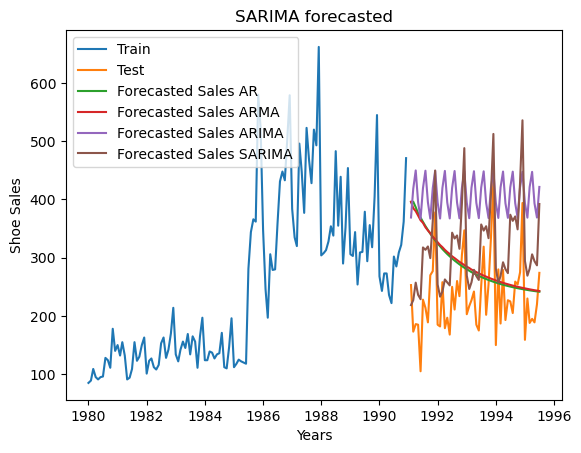

In [150]:
#Plotting the forecasted value
plt.plot(train['YearMonth'],train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')
plt.plot(test['YearMonth'],pred_AR,label='Forecasted Sales AR')
plt.plot(test['YearMonth'],pred_ARMA,label='Forecasted Sales ARMA')
plt.plot(test['YearMonth'],pred_ARIMA,label='Forecasted Sales ARIMA')
plt.plot(test['YearMonth'],pred_SARIMA,label='Forecasted Sales SARIMA')
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.legend(loc='best')
plt.title('SARIMA forecasted')
plt.show()
plt.close()

In [151]:
#printing all the results together
result_Shoe_Sales=pd.concat([result_tempSARIMA,resultsDf_temp])
result_Shoe_Sales

,RMSE (sklearn),RMSE (statsmodel),MAPE
"AutoRegression(3,0,0)",99.353764,99.353764,39.944866
"AutoRegression Moving Average(ARMA(3,0,3)",99.070716,99.070716,40.292132
"ARIMA(3,1,2)",182.160170,182.160170,84.216531
"SARIMA(3,1,2)(3,0,2,12)",92.106630,92.106630,38.983994
"Alpha=0.605,SES",195.894595,195.894595,91.420760
"Alpha=0.594,Beta=0.00027,DES",264.824827,264.824827,122.325284
"Alpha=0.5722,Beta=0.0104,Gamma=0.2733,TES Additive",126.387633,126.387633,49.906727
"Alpha=0.6009,Beta=0.0061,Gamma=0.1757,TES Multiplicative",122.178545,122.178545,48.032998
Linear RegressionOnTime,264.516794,264.516794,122.140758
Naive Approach,84.648401,84.648401,29.172387


From the results it can be observed that Naive Approach has the lowest RMSE and MAPE values

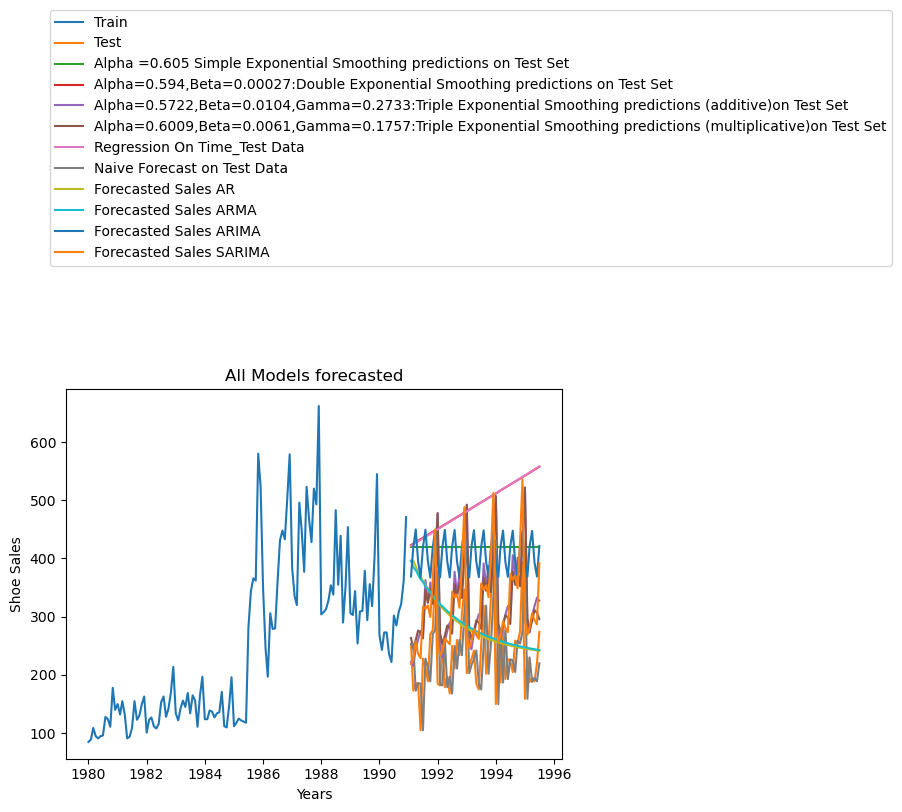

In [159]:
#Plotting all the forecasted value
plt.plot(train['YearMonth'],train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')
plt.plot(test['YearMonth'],SES_predict, label='Alpha =0.605 Simple Exponential Smoothing predictions on Test Set')
plt.plot(test['YearMonth'],DES_predict, label='Alpha=0.594,Beta=0.00027:Double Exponential Smoothing predictions on Test Set')
plt.plot(test['YearMonth'],TES_predict, label='Alpha=0.5722,Beta=0.0104,Gamma=0.2733:Triple Exponential Smoothing predictions (additive)on Test Set')
plt.plot(test['YearMonth'],TES_predict_m, label='Alpha=0.6009,Beta=0.0061,Gamma=0.1757:Triple Exponential Smoothing predictions (multiplicative)on Test Set')
plt.plot(test['YearMonth'],LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(test['YearMonth'],NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(test['YearMonth'],pred_AR,label='Forecasted Sales AR')
plt.plot(test['YearMonth'],pred_ARMA,label='Forecasted Sales ARMA')
plt.plot(test['YearMonth'],pred_ARIMA,label='Forecasted Sales ARIMA')
plt.plot(test['YearMonth'],pred_SARIMA,label='Forecasted Sales SARIMA')
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.legend(bbox_to_anchor=(1.68,1.68),loc='center right')
plt.title('All Models forecasted')
plt.show()
plt.close()

## 1.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Naive forecasing method ha the lowest MAPE AND RMSE value.SARIMA has the 2nd lowest MAPE AND RMSE value.We will be using SARIMA to forecast future 12 months data.

In [178]:
date=pd.date_range(start='8/1/1995',end='7/1/1996',freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [179]:
future_predictions=pd.DataFrame(columns=['Shoe_Sales'],index=date)

In [180]:
future_predictions.head()

,Shoe_Sales
1995-08-01,NaN
1995-09-01,NaN
1995-10-01,NaN
1995-11-01,NaN
1995-12-01,NaN


In [181]:
future_SARIMA1 = SARIMA_model1.forecast(12)

In [182]:
future_predictions['Shoe_Sales']=(future_SARIMA1*future_SARIMA1)

In [183]:
future_predictions

,Shoe_Sales
1995-08-01,240.234233
1995-09-01,218.654236
1995-10-01,227.131167
1995-11-01,257.170779
1995-12-01,236.259481
1996-01-01,228.727932
1996-02-01,317.641622
1996-03-01,313.573962
1996-04-01,319.337549
1996-05-01,299.325629


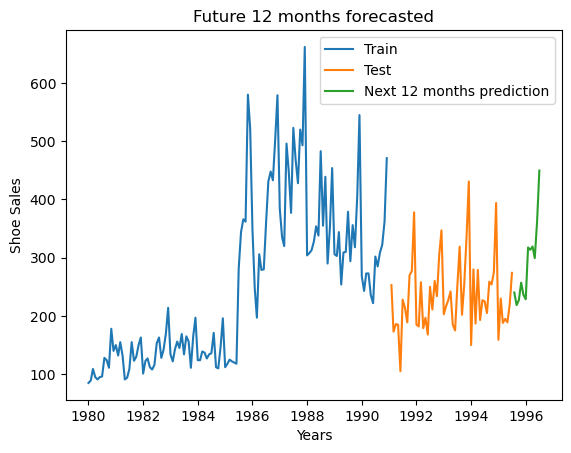

In [185]:
#Plotting all the forecasted value
plt.plot(train['YearMonth'],train['Shoe_Sales'], label='Train')
plt.plot(test['YearMonth'],test['Shoe_Sales'], label='Test')
plt.plot(future_predictions.index,future_predictions['Shoe_Sales'],label='Next 12 months prediction')
plt.xlabel('Years')
plt.ylabel('Shoe Sales')
plt.legend(loc='best')
plt.title('Future 12 months forecasted')
plt.show()
plt.close()

Findings and Suggestions:
1)There are outliers in the month of April and May which tells us that some sales were unsual.
2)In the 2nd half of each year the sales increases.December has the highest sales which may be due to holiday season.
3)The sales can be increased by advertising more and launching new shoes .
4)Discount should be added in the off season(when the sales decreases) to increase the sales.